# Day 69: CNNs in Practice with TensorFlow/Keras

In the last session, we discussed Data Augmentation and Image Preprocessing — flipping, cropping, normalization, and how it helps improve generalization.

Today, we’re going hands-on 🧑‍💻 with Convolutional Neural Networks (CNNs) using TensorFlow/Keras.
We’ll train a CNN model on the Fashion-MNIST dataset, which contains 70,000 grayscale images (28×28 pixels) of 10 clothing categories — T-shirts, shoes, bags, etc.

By the end of this session, you’ll know exactly how to build, compile, train, and evaluate a CNN — the same process used in real-world image classification tasks.

## Topics Covered:

- Introduction to Fashion-MNIST Dataset

- Data Preprocessing for CNNs

- Building the CNN Model Architecture in Keras

- Compiling and Training the Model

- Model Evaluation and Visualization

## Introduction to Fashion-MNIST Dataset

This dataset is a great starting point for computer vision. Think of it as the slightly harder version of the classic handwritten digit MNIST. It contains 60,000 training images and 10,000 test images of fashion items from 10 different classes (like T-shirt, Trouser, Pullover, etc.). Each image is a small, 28x28 grayscale image

In [5]:
from tensorflow.keras.datasets import fashion_mnist

# Unpacking the data into train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


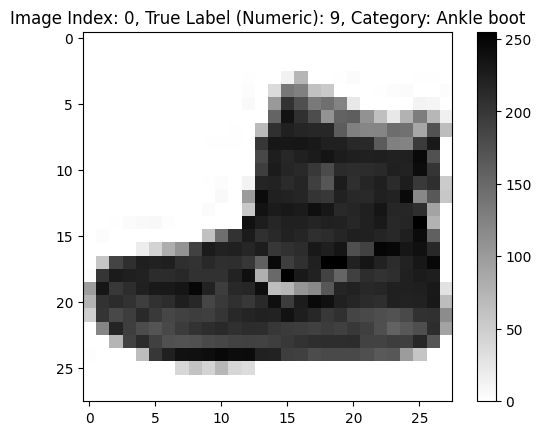

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 10 Human-readable class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select the first image and its label
img_index = 0
image_to_plot = train_images[img_index]
true_label = train_labels[img_index]

# Plot the image
plt.figure()
plt.imshow(image_to_plot, cmap=plt.cm.binary) # Use binary colormap for grayscale
plt.title(f"Image Index: {img_index}, True Label (Numeric): {true_label}, Category: {class_names[true_label]}")
plt.colorbar()
plt.grid(False)
plt.show() #

c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8404 - loss: 0.4413 - val_accuracy: 0.8520 - val_loss: 0.3880
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8892 - loss: 0.3016 - val_accuracy: 0.8893 - val_loss: 0.2985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9054 - loss: 0.2561 - val_accuracy: 0.8946 - val_loss: 0.2824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9165 - loss: 0.2236 - val_accuracy: 0.9052 - val_loss: 0.2674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9269 - loss: 0.1988 - val_accuracy: 0.9065 - val_loss: 0.2566
313/313 - 1s - 2ms/step - accuracy: 0.9065 - loss: 0.2566

✅ Test Accuracy: 0.906499981880188


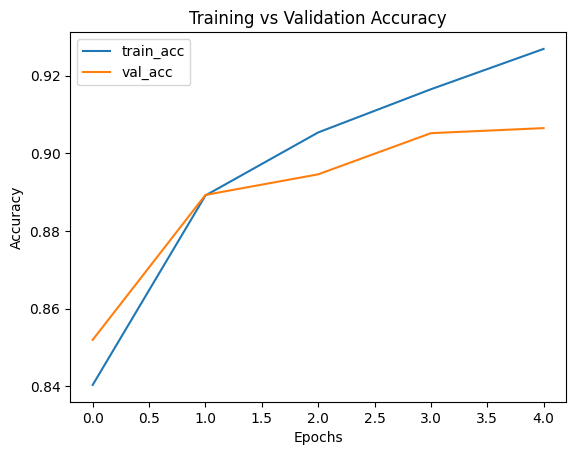

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


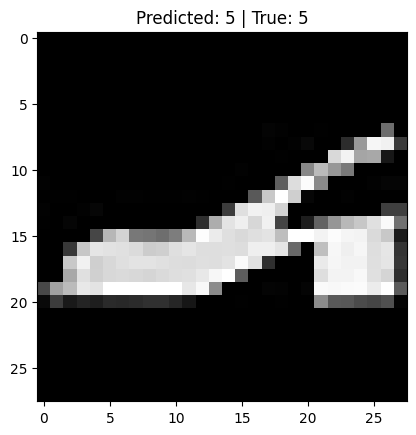

In [ ]:
# Day 69: CNNs in Practice with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pltfrom
import numpy as np

# 1. Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 2. Normalize pixel values (0-255 → 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3. Reshape to include channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 4. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 6. Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 7. Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n✅ Test Accuracy:", test_acc)

# 8. Plot training results
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 9. Predict a random image
predictions = model.predict(test_images)
index = np.random.randint(0, len(test_images))
plt.imshow(test_images[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])} | True: {test_labels[index]}")
plt.show()
